# Multiple Linear Regression

## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

### No blank cells.
### Removed date column since not needed.
### Column 2 is dependent variable.
### Remaining columns are independent variables.

In [14]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00618/Steel_industry_data.csv')
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

## Check for missing values in dataset

In [11]:
missing = dataset.isnull().sum()
print('Below output shows the number of empty cells in each column')
print(missing)

Below output shows the number of empty cells in each column
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


## Check for data type of each column to identify and encode categorical data

In [30]:
dataset.dtypes

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

In [31]:
print(X)

[[2.95 0.0 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 [4.46 0.0 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 [3.28 0.0 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 ...
 [3.17 0.07 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 [3.06 0.11 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 [3.02 0.07 0.0 ... 'Weekday' 'Monday' 'Light_Load']]


In [32]:
print(y)

[3.17 4.   3.24 ... 3.78 3.78 3.67]


## Encoding categorical data

Convert week status column using label encoder since only 2 values weekday and weekend present.

In [33]:
print('before label encoding')
print(X[:, 6])

before label encoding
['Weekday' 'Weekday' 'Weekday' ... 'Weekday' 'Weekday' 'Weekday']


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 6] = le.fit_transform(X[:, 6])

In [35]:
print('after label encoding')
print(X[:, 6])

after label encoding
[0 0 0 ... 0 0 0]


Convert both columns day of week and type of load using one hot encoding.

In [36]:
print('before one hot encoding')
print(X[:, 7:9])

before one hot encoding
[['Monday' 'Light_Load']
 ['Monday' 'Light_Load']
 ['Monday' 'Light_Load']
 ...
 ['Monday' 'Light_Load']
 ['Monday' 'Light_Load']
 ['Monday' 'Light_Load']]


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7, 8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [38]:
print('after one hot encoding')
print(X[:, :10])

after one hot encoding
[[0.0 1.0 0.0 ... 1.0 0.0 0.0]
 [0.0 1.0 0.0 ... 1.0 0.0 0.0]
 [0.0 1.0 0.0 ... 1.0 0.0 0.0]
 ...
 [0.0 1.0 0.0 ... 1.0 0.0 0.0]
 [0.0 1.0 0.0 ... 1.0 0.0 0.0]
 [0.0 1.0 0.0 ... 1.0 0.0 0.0]]


## Splitting the dataset into the Training set and Test set

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
print(X_train)

[[0.0 0.0 0.0 ... 100.0 84600 0]
 [0.0 0.0 0.0 ... 100.0 35100 0]
 [0.0 0.0 0.0 ... 100.0 2700 0]
 ...
 [0.0 0.0 0.0 ... 100.0 61200 0]
 [1.0 0.0 0.0 ... 100.0 25200 0]
 [0.0 1.0 0.0 ... 100.0 40500 0]]


In [41]:
print(y_train)

[  3.46  59.36  54.54 ... 114.91   2.66  90.97]


In [42]:
print(X_test)

[[0.0 0.0 0.0 ... 100.0 64800 0]
 [0.0 1.0 0.0 ... 99.98 0 0]
 [0.0 0.0 0.0 ... 37.57 44100 0]
 ...
 [0.0 0.0 0.0 ... 100.0 35100 0]
 [0.0 0.0 0.0 ... 18.19 38700 1]
 [0.0 0.0 1.0 ... 44.88 65700 1]]


In [43]:
print(y_test)

[54.22  3.67  4.03 ... 88.63  3.13  3.31]


## Training the Multiple Linear Regression model on the Training set

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [45]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[42.05 54.22]
 [ 4.54  3.67]
 [ 4.98  4.03]
 ...
 [86.28 88.63]
 [ 2.96  3.13]
 [ 3.36  3.31]]


## Calculating Mean Square Error (MSE) in Multiple Linear Regression

In [46]:
error = y_pred - y_test
square_error = error ** 2
add_square_error = 0
for i in square_error:
    add_square_error += i
sum_square_error = add_square_error
mean_square_error = sum_square_error / len(y_pred)
print('Mean Square Error (MSE) is: ', mean_square_error)

Mean Square Error (MSE) is:  25.49662132425259


## Calculating Root Mean Square Error (RMSE) in Multiple Linear Regression

In [47]:
from math import sqrt
root_mean_square_error = sqrt(mean_square_error)
print('Root Mean Square Error (RMSE) is: ', root_mean_square_error)

Root Mean Square Error (RMSE) is:  5.049417919349971


## Calculating Mean Absolute Error (MAE) in Multiple Linear Regression

In [48]:
absolute_error = abs(error)
add_absolute_error = 0
for i in absolute_error:
    add_absolute_error += i
sum_absolute_error = add_absolute_error
mean_absolute_error = sum_absolute_error / len(y_pred)
print('Mean Absolute Error (MAE) is: ', mean_absolute_error)

Mean Absolute Error (MAE) is:  2.5773314275966404


## Plotting actual and predicted results in matplotlib for Multiple Linear Regression

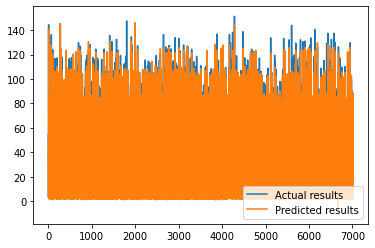

In [49]:
plt.plot(y_test, label='Actual results')
plt.plot(y_pred, label='Predicted results')
plt.legend(loc= 'lower right')
plt.show()

## Boxplot of results to show how similar they are in Multiple Linear Regression

([<matplotlib.axis.XTick at 0x225db35dbd0>,
 [Text(1, 0, 'Test results'), Text(2, 0, 'Predicted results')])

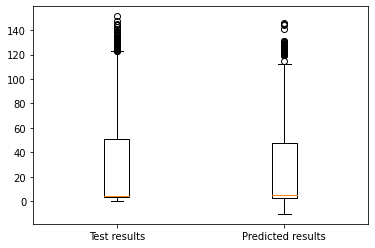

In [50]:
results = [y_test, y_pred]
plt.boxplot(results)
plt.xticks([1, 2], ['Test results', 'Predicted results'])